In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

pb.pltutils.use_style()

In [2]:
import pybinding as pb

d = 0.2  # [nm] unit cell length
t = 1    # [eV] hopping energy

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d, 0], a2=[0, d])
lattice.add_sublattices(
    ('A', [0, 0])  # add an atom called 'A' at position [0, 0]
)
lattice.add_hoppings(
    # (relative_index, from_sublattice, to_sublattice, energy)
    ([0, 1], 'A', 'A', t),
    ([1, 0], 'A', 'A', t)
)

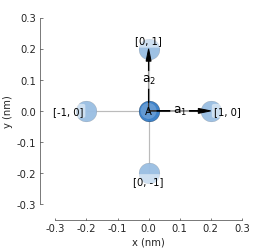

In [3]:
lattice.plot()  # plot the lattice that was just constructed
plt.show()      # standard matplotlib show() function

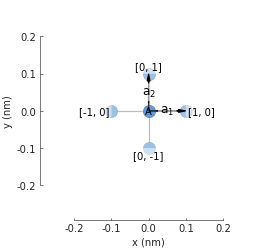

In [4]:
def square_lattice(d, t):
    lat = pb.Lattice(a1=[d, 0], a2=[0, d])
    lat.add_sublattices(('A', [0, 0]))
    lat.add_hoppings(([0, 1], 'A', 'A', t),
                     ([1, 0], 'A', 'A', t))
    return lat

# we can quickly set a shorter unit length `d`
lattice = square_lattice(d=0.1, t=1)
lattice.plot()
plt.show()

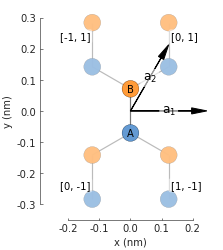

In [5]:
from math import sqrt

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()

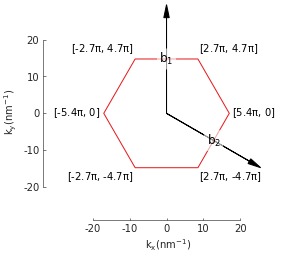

In [6]:
lattice = monolayer_graphene()
lattice.plot_brillouin_zone()

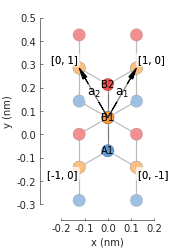

In [7]:
from pybinding.repository import graphene
lattice = graphene.bilayer()
lattice.plot()

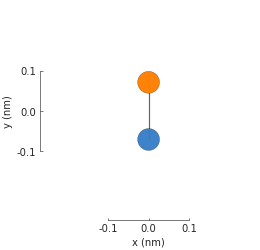

In [8]:
from pybinding.repository import graphene

model = pb.Model(graphene.monolayer())
model.plot()

In [15]:
>>> model.system.x
[0, 0]
>>> model.system.y
[-0.071, 0.071]
>>> model.system.sublattices
[0, 1]

[0, 1]

In [16]:
>>> model.hamiltonian
(0, 1)   -2.8
(1, 0)   -2.8

TypeError: unsupported operand type(s) for -: 'tuple' and 'float'

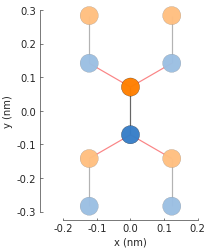

In [17]:
model = pb.Model(
    graphene.monolayer(),
    pb.translational_symmetry()
)
model.plot()

In [18]:
>>> model = pb.Model(graphene.monolayer())
>>> solver = pb.solver.lapack(model)
>>> solver.eigenvalues
[-2.8 2.8]
>>> solver.eigenvectors
[[-0.707 -0.707]
 [-0.707  0.707]]

SyntaxError: invalid syntax (<ipython-input-18-f63a71e6558b>, line 4)

In [20]:
import pybinding as pb
model = pb.model(
    graphene.monolayer(),
    pb.primitive(a1=5,a2=3)
)
model.plot()
model.lattice.plot_vectors(position=[0.6, -0.25])

TypeError: 'module' object is not callable

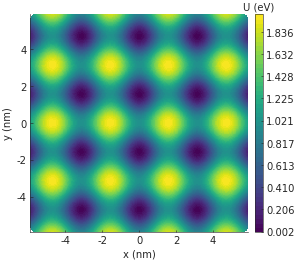

In [23]:
from pybinding.repository import graphene

model = pb.Model(
    graphene.monolayer(),
    pb.rectangle(12),
    potential
)

model.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")

In [22]:
@pb.onsite_energy_modifier
def potential(x, y):
    return np.sin(x)**2 + np.cos(y)**2